In [1]:
!pip install gstools

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from gstools import SRF, Gaussian
from gstools.random import MasterRNG

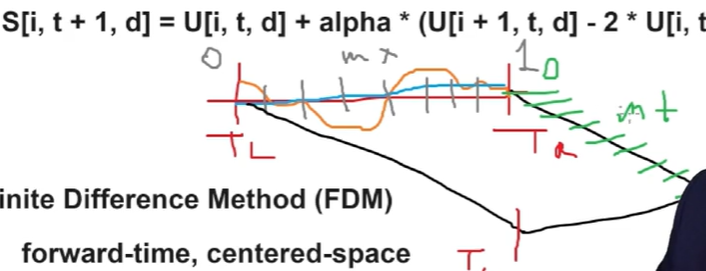

Variables Setup (mx, mt, n):
* mx = 15: Represents the number of spatial points in the x direction.
* mt = 50: Represents the number of temporal points in the y direction.
* n = 110: The number of different random functions or samples.

Creating Spatial and Temporal Points:
* x = np.linspace(0, x_range, mx): Generates mx equally spaced points between 0 and x_range. This represents the spatial grid for the random field.
* y = np.linspace(0, y_range, mt): Generates mt equally spaced points between 0 and y_range. This represents the time or temporal grid for the random field.

Random Field Generation (one_function):
* seed = MasterRNG(123): Creates a random number generator with a fixed seed for reproducibility.
* def one_function(x): Defines a function that generates random values over the spatial points x.
* model = Gaussian(dim=1, var=50, len_scale=0.6): Creates a Gaussian model for the random field in 1D, with a variance of 50 and a length scale of 0.6.
* srf = SRF(model, seed=seed()): Uses the Gaussian model to create a structured random field (srf). The seed ensures reproducibility.
* f = srf.structured([x]): Generates the random field values over the spatial points x.

Populating U_in and U:
* U_in = np.zeros((mx, n)): Creates an empty matrix to store n sets of random functions over mx points.
* U = np.zeros((mx, mt, n)): Creates a 3D matrix to store time-series data for each random function over mt time steps.
* Outer Loop (for nn in range(n):):
  * x_values = one_function(x): Generates a random function for the current iteration over x.
  * U_in[:, nn] = x_values: Stores this random function in the U_in matrix.
  * Inner Loop (for tt in range(mt):):
    * U[:, tt, nn] = x_values: Replicates the random function across all time steps in the 3D matrix U.

In [3]:
mx = 15
mt = 50
n = 110

x_range = 1
y_range = 10

In [4]:
x = np.linspace(0, x_range, mx)
y = np.linspace(0, y_range, mt)

In [5]:
x

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [6]:
y

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

# Now we make the orange curve

What This Code is Doing:
* It generates random functions using a Gaussian model over the spatial points defined by x.
* It stores these random functions into U_in and fills U to represent these functions across time steps.

Example to Visualize:
* Spatial Points (x): Think of x as different positions along a line (e.g., a 1D space).
* Temporal Points (y): These represent different times (e.g., each step from 0 to 10).
* Random Field: The code generates curves (random functions) over x using Gaussian noise and fills U_in with these curves. Then, it replicates each curve across multiple time steps in U.

In [7]:
seed = MasterRNG(123)
def one_function(x):
  model = Gaussian(dim=1, var=50, len_scale=0.6)
  srf = SRF(model, seed=seed())
  f = srf.structured([x])
  return f

In [8]:
U_in = np.zeros((mx,n))
U = np.zeros((mx,mt,n))

for nn in range(n):
  x_values = one_function(x)
  U_in[:, nn] = x_values
  for tt in range(mt):
    U[:,tt,nn] = x_values

(15, 50)
(15, 50)


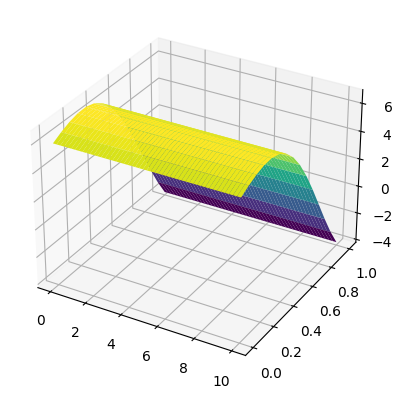

In [9]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U[:,:,10], cmap='viridis')

(15, 50)
(15, 50)


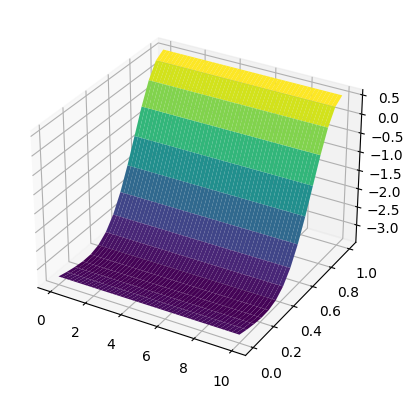

In [10]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U[:,:,5], cmap='viridis')

(15, 50)
(15, 50)


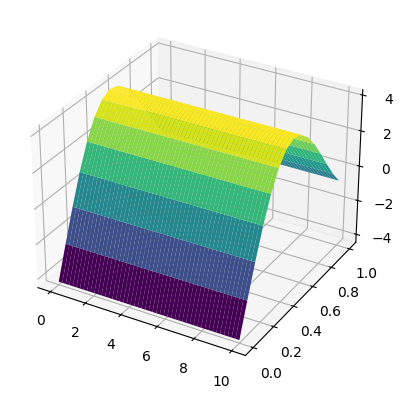

In [11]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U[:,:,3], cmap='viridis')

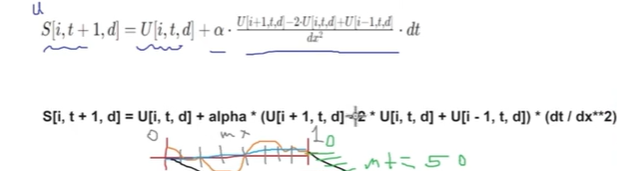

In [12]:
S = np.zeros((mx,mt,n))
S = U
dx = abs(x[0]-x[1])
dt = abs(y[0]-y[1])
alpha = 0.01

for d in range(n):
    for t in range(1, mt-1):
        for i in range(1,mx-1):
            S[i, t + 1, d] = U[i, t, d] + alpha * (U[i + 1, t, d] - 2 * U[i, t, d] + U[i - 1, t, d]) * (dt / dx**2)

(15, 50)
(15, 50)


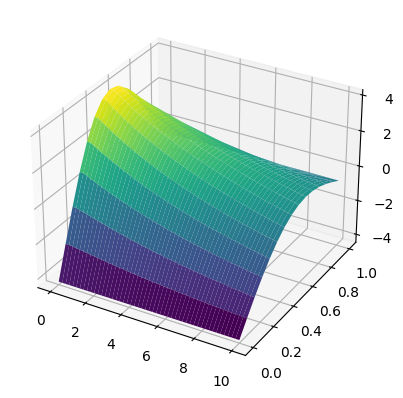

In [13]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, S[:,:,3], cmap='viridis')

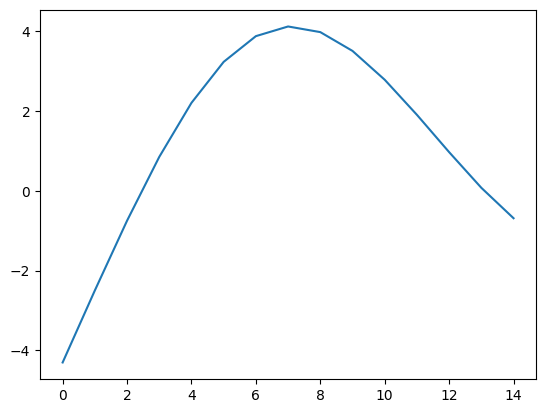

In [14]:
plt.plot(U_in[:,3])

In [15]:
x.shape, y.shape, S.shape, U_in.shape

((15,), (50,), (15, 50, 110), (15, 110))

In [16]:
combinations = []

for i in range(len(x)):
  for j in range(len(y)):
    combinations.append((x[i], y[j]))

combinations = np.array(combinations)
print(combinations.shape)
print(combinations)

(750, 2)
[[ 0.          0.        ]
 [ 0.          0.20408163]
 [ 0.          0.40816327]
 ...
 [ 1.          9.59183673]
 [ 1.          9.79591837]
 [ 1.         10.        ]]


In [17]:
print(mx*mt)

750


In [18]:
x = combinations

In [19]:
x_space = np.linspace(0, x_range, mx)
y_space = np.linspace(0, y_range, mt)

In [20]:
def iterate_dataset(mx=mx, mt=mt, n=n, x=x, U_in=U_in, U=U, S=S):
  us = np.zeros((mx*mt*n, mx))
  xs = np.zeros((mx*mt*n, 2))
  ss = np.zeros((mx*mt*n, 1))
  count = 0
  for i in range(n):
    for j in range(mx):
      for k in range(mt):
        us[count, :] = U_in[:,i]
        xs[count] = [x_space[j], y_space[k]]
        ss[count] = S[j, k, i]
        count += 1
  return us, xs, ss

In [21]:
us, xs, ss = iterate_dataset()

In [22]:
us.shape, xs.shape, ss.shape

((82500, 15), (82500, 2), (82500, 1))

In [23]:
us

array([[ 2.58409427,  3.25747588,  4.13670272, ...,  8.78692189,
         8.27077546,  7.71779182],
       [ 2.58409427,  3.25747588,  4.13670272, ...,  8.78692189,
         8.27077546,  7.71779182],
       [ 2.58409427,  3.25747588,  4.13670272, ...,  8.78692189,
         8.27077546,  7.71779182],
       ...,
       [ 1.86832538,  1.09753203,  0.13208562, ..., -5.13381005,
        -4.12316247, -2.93187956],
       [ 1.86832538,  1.09753203,  0.13208562, ..., -5.13381005,
        -4.12316247, -2.93187956],
       [ 1.86832538,  1.09753203,  0.13208562, ..., -5.13381005,
        -4.12316247, -2.93187956]])

In [24]:
xs

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.20408163],
       [ 0.        ,  0.40816327],
       ...,
       [ 1.        ,  9.59183673],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.        ]])

In [25]:
ss

array([[ 2.58409427],
       [ 2.58409427],
       [ 2.58409427],
       ...,
       [-2.93187956],
       [-2.93187956],
       [-2.93187956]])

In [26]:
def batch_dataset(batch_size, mx=mx, mt=mt, n=n, x=x, U=U, S=S, ratio=0.8):
    us, xs, ss = iterate_dataset(mx,mt,n,x,U_in,U,S)

    train_size = int(len(us)*ratio)

    us_train = us[:train_size]
    xs_train = xs[:train_size]
    ss_train = ss[:train_size]

    us_test = us[train_size:]
    xs_test = xs[train_size:]
    ss_test = ss[train_size:]

    us_train = torch.tensor(us_train, dtype= torch.float32)
    xs_train = torch.tensor(xs_train, dtype= torch.float32)
    ss_train = torch.tensor(ss_train, dtype= torch.float32)
    train_dataset = torch.utils.data.TensorDataset(us_train,xs_train,ss_train)
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    us_test = torch.tensor(us_test, dtype= torch.float32)
    xs_test = torch.tensor(xs_test, dtype= torch.float32)
    ss_test = torch.tensor(ss_test, dtype= torch.float32)
    test_dataset = torch.utils.data.TensorDataset(us_test,xs_test,ss_test)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


    return train_dataloader, test_dataloader

In [27]:
train_data, test_data = batch_dataset(batch_size=32, mt=mt, n=n, x=x, U=U, S=S, ratio=0.8)

In [28]:
for u_in_, x_, s_ in train_data:
  print("u_in_.shape: ", u_in_.shape, "x_.shape: ", x_.shape, "s_.shape", s_.shape)
  break

u_in_.shape:  torch.Size([32, 15]) x_.shape:  torch.Size([32, 2]) s_.shape torch.Size([32, 1])


In [29]:
import torch.nn as nn

class DeepONet(nn.Module):
    def __init__(self, neurons=40, in1 = mx, in2= 2, output_neurons =20):
        super(DeepONet, self).__init__()
        self.neurons = neurons
        self.duble_neurons = 2*neurons
        self.in1 = in1
        self.in2 = in2
        self.output_neurons = output_neurons
        self.branch = self.branch_network()
        self.trunk = self.trunk_network()

    def branch_network(self):
        branch = nn.Sequential(
            nn.Linear(self.in1,self.duble_neurons),
            nn.ReLU(),
            nn.Linear(self.duble_neurons,self.neurons),
            nn.ReLU(),
            nn.Linear(self.neurons,self.output_neurons),
        )
        return branch

    def trunk_network(self):
        trunk=nn.Sequential(
            nn.Linear(self.in2,self.neurons),
            nn.ReLU(),
            nn.Linear(self.neurons,self.neurons),
            nn.ReLU(),
            nn.Linear(self.neurons,self.neurons),
            nn.ReLU(),
            nn.Linear(self.neurons,self.output_neurons),
        )
        return trunk

    def forward(self, x1, x2):
        x1 = self.branch(x1)
        x2 = self.trunk(x2)
        x = torch.einsum("bi, bi->b", x1,x2)
        x = torch.unsqueeze(x,1)
        return x

In [30]:
model = DeepONet(neurons=40, in1=mx, in2=2, output_neurons=20)

In [31]:
model

DeepONet(
  (branch): Sequential(
    (0): Linear(in_features=15, out_features=80, bias=True)
    (1): ReLU()
    (2): Linear(in_features=80, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=20, bias=True)
  )
  (trunk): Sequential(
    (0): Linear(in_features=2, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=20, bias=True)
  )
)

# training process

In [32]:
def loss(y_pred, y):
  return torch.mean((y_pred-y)**2)

In [33]:
# optimizer = torch.optim.LBFGS(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
import torch.nn as nn
import torch.optim as optim

train_losses = []

def closure():
    optimizer.zero_grad()
    l_total = 0

    for u_, x_, s_ in train_data:
        model.train()
        y_pred = model(u_, x_)
        l = loss(y_pred, s_)
        l_total += l.item()
        l.backward()

    l_total = l_total/ len(train_data)
    train_losses.append(l_total)

    return l_total

epochs = 200 #600

for i in range(epochs):
    optimizer.step(closure)

    if i%20 == 0:
      print(f"Epoch: {i} / {epochs}, loss: {train_losses[-1]}")

Epoch: 0 / 200, loss: 51.98271775395906
Epoch: 20 / 200, loss: 15.932035071146009
Epoch: 40 / 200, loss: 10.918953465074807
Epoch: 60 / 200, loss: 10.45782327004792
Epoch: 80 / 200, loss: 9.871320940947799
Epoch: 100 / 200, loss: 6.9748613622312226
Epoch: 120 / 200, loss: 1.8736618355935024
Epoch: 140 / 200, loss: 1.144926178747164
Epoch: 160 / 200, loss: 1.074319915846893
Epoch: 180 / 200, loss: 1.0132059428192606


Text(0, 0.5, 'Loss (MSE)')

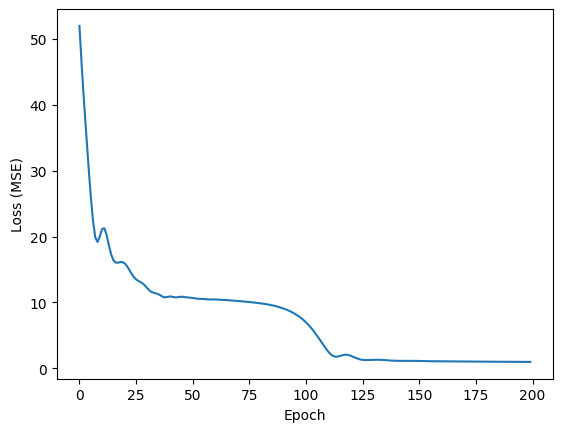

In [36]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

In [37]:
mx = 15
mt = 50
n = 110
x_range = 1
y_range = 10

In [38]:
x_gen = np.linspace(0, x_range, mx)
y_gen = np.linspace(0, y_range, mt)

In [39]:
seed = MasterRNG(321)
def one_function(x):
    model = Gaussian(dim=1, var=50, len_scale=0.6)
    srf= SRF(model, seed=seed())
    f = srf.structured([x])
    return f

In [40]:
UU_in = np.zeros((mx,n))
UU = np.zeros((mx,mt,n))

for nn in range(n):
    x_values = one_function(x_gen)
    UU_in[:,nn] = x_values
    for tt in range(mt):
        UU[:,tt,nn] = x_values

In [41]:
# change the number here if want to see more
target_result = 6
################################################


U_gen = UU_in[:,target_result]

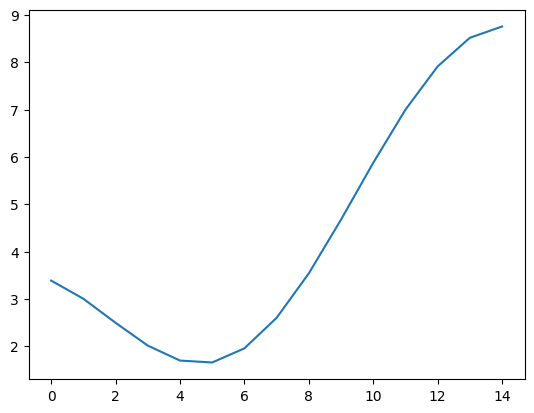

In [42]:
plt.plot(U_gen)

In [43]:
model.eval()
print(U_gen.shape)

(15,)


In [44]:
U_gen = torch.tensor(U_gen, dtype=torch.float32).unsqueeze(0)

In [45]:
x

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.20408163],
       [ 0.        ,  0.40816327],
       ...,
       [ 1.        ,  9.59183673],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.        ]])

In [46]:
x_train = torch.tensor(x, dtype=torch.float32)

In [47]:
p = model(U_gen, x_train)

In [48]:
p = p.detach().numpy()

In [49]:
p.shape

(750, 1)

In [50]:
p_reshape = p.reshape(mx, mt)

In [51]:
p_reshape.shape

(15, 50)

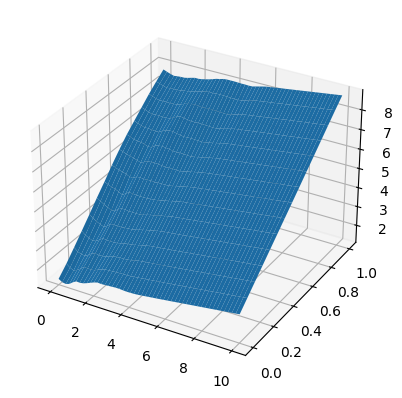

In [52]:
X, Y = np.meshgrid(y_gen,x_gen)
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(X, Y, p_reshape)

In [53]:
S = np.zeros((mx,mt,n))
S = UU
dx = abs(x_gen[0]-x_gen[1])
dt = abs(y_gen[0]-y_gen[1])
alpha = 0.01

for d in range(n):
    for t in range(1, mt-1):
        for i in range(1,mx-1):
            S[i, t + 1, d] = UU[i, t, d] + alpha * (UU[i + 1, t, d] - 2 * UU[i, t, d] + UU[i - 1, t, d]) * (dt / dx**2)

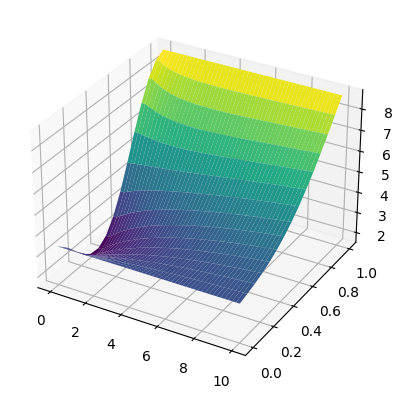

In [54]:
X, Y = np.meshgrid(y_gen,x_gen)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(X, Y, S[:,:,target_result], cmap='viridis')

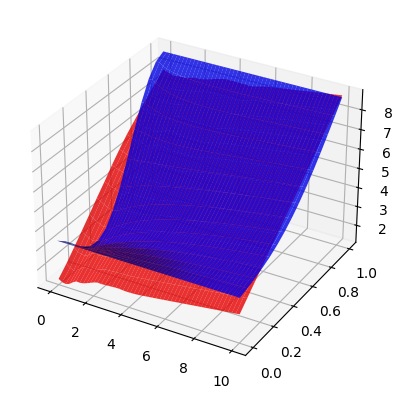

In [55]:
X, Y = np.meshgrid(y_gen,x_gen)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.plot_surface(X, Y, S[:,:,target_result], alpha=0.8, color = 'b')

ax.plot_surface(X, Y, p_reshape, alpha=0.8, color = 'r')

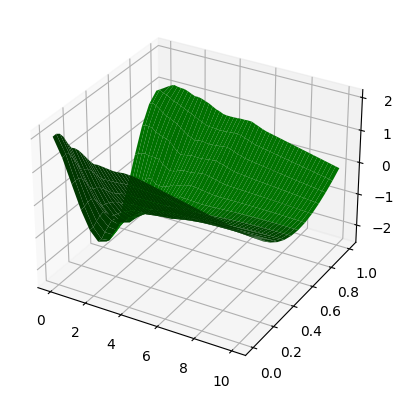

In [56]:
X, Y = np.meshgrid(y_gen,x_gen)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.plot_surface(X, Y, S[:,:,target_result]-p_reshape, alpha=1, color = 'g')